In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
import tensorboardcolab as tbc

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 2s 0us/step


In [3]:
#How the data looks like ?
print("Shape of the data : ",x_train.shape)
print("first review in the training data : ")
print(x_train[0])
print("class : ", y_train[0])

Shape of the data :  (25000,)
first review in the training data : 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 17

In [0]:
#for decoding reviews back to english
def decode_review(target, num_sentence):
  word_index = imdb.get_word_index()
  reversed_word_index = dict([(value,key) for (key, value) in word_index.items()])
  #indices are offset by 3 because 0,1 and 2 are  reserved indices for 'padding','start of sequence'  and unknown 
  review = ' '.join([reversed_word_index.get(i-3,"") for i in target[num_sentence]])
  return review
  

In [5]:
print("The first sentence in the training data")
decode_review(x_train,0)

The first sentence in the training data
1646592/1641221 [==============================] - 1s 1us/step


" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [0]:
#Preparing the data
#For maximum clarity let's do that manually
def vectorize_sequence(sequences, dimension=10000):
  data = np.zeros(shape=(len(sequences),10000))
  for i,sequence in enumerate(sequences):
    data[i,sequence] = 1
  return data
    

In [0]:
#vectorizing training and test data
training_set = vectorize_sequence(x_train)
test_set = vectorize_sequence(x_test)

In [0]:
#vectorize labels
training_label = np.asarray(y_train).astype('float32')
test_labes = np.asarray(y_test).astype('float32')


In [9]:
#implementing the network
model = Sequential()
model.add(Dense(16,activation="relu",input_shape=(10000,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
val_data = training_set[:5000]
val_label = training_label[:5000]
training_data = training_set[5000:]
training_lab = training_label[5000:]

In [0]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [12]:
history = model.fit(training_data,training_lab,epochs=10,batch_size=512,validation_data=(val_data,val_label))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 124us/step - loss: 0.4726 - acc: 0.8065 - val_loss: 0.3671 - val_acc: 0.8576
Epoch 2/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.2718 - acc: 0.9059 - val_loss: 0.2939 - val_acc: 0.8864
Epoch 3/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.2025 - acc: 0.9306 - val_loss: 0.2697 - val_acc: 0.8916
Epoch 4/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.1668 - acc: 0.9412 - val_loss: 0.2804 - val_acc: 0.8904
Epoch 5/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.1407 - acc: 0.9516 - val_loss: 0.2834 - val_acc: 0.8898
Epoch 6/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.1189 - acc: 0.9593 - val_loss: 0.3087 - val_acc: 0.8862
Epoch 7/10
20000/20000 [==============================] - 2s 79us/step - loss: 0

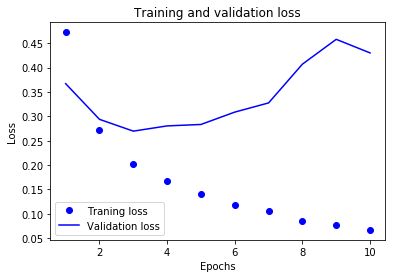

In [13]:
hist = history.history
epochs = range(1, len(hist['acc'])+1)
loss_values = hist['loss']
val_loss_values = hist['val_loss']

plt.plot(epochs,loss_values,'bo',label="Traning loss")
plt.plot(epochs,val_loss_values,'b',label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()

Text(0.5, 1.0, 'Training and validation accuracy')

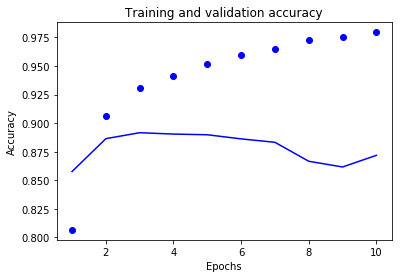

In [14]:
hist = history.history
epochs = range(1, len(hist['acc'])+1)
acc_values = hist['acc']
val_acc_values = hist['val_acc']

plt.plot(epochs,acc_values,'bo',label="Traning accuracy")
plt.plot(epochs,val_acc_values,'b',label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")

In [15]:
results = model.evaluate(test_set,test_labes)

25000/25000 [==============================] - 2s 92us/step


In [16]:
results

[0.4889593293237686, 0.85144]

In [0]:
#encoding an arbitrary sentence
word_index = imdb.get_word_index()
def encode_sentence(sentence,dim=10000):
  data = np.zeros(dim)
  words = sentence.split(" ")
  for word in words:
    if word in word_index:
      data[word_index[word]] = 1
  return data

In [18]:
model.predict(test_set)

array([[0.05588132],
       [0.99995255],
       [0.01788181],
       ...,
       [0.05725533],
       [0.01035193],
       [0.37567252]], dtype=float32)